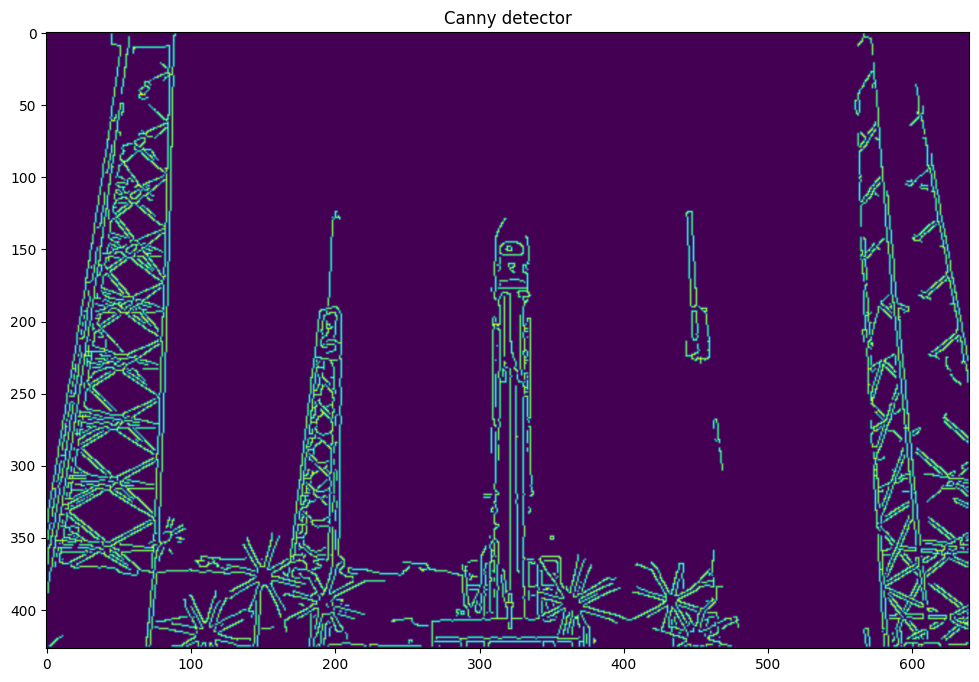

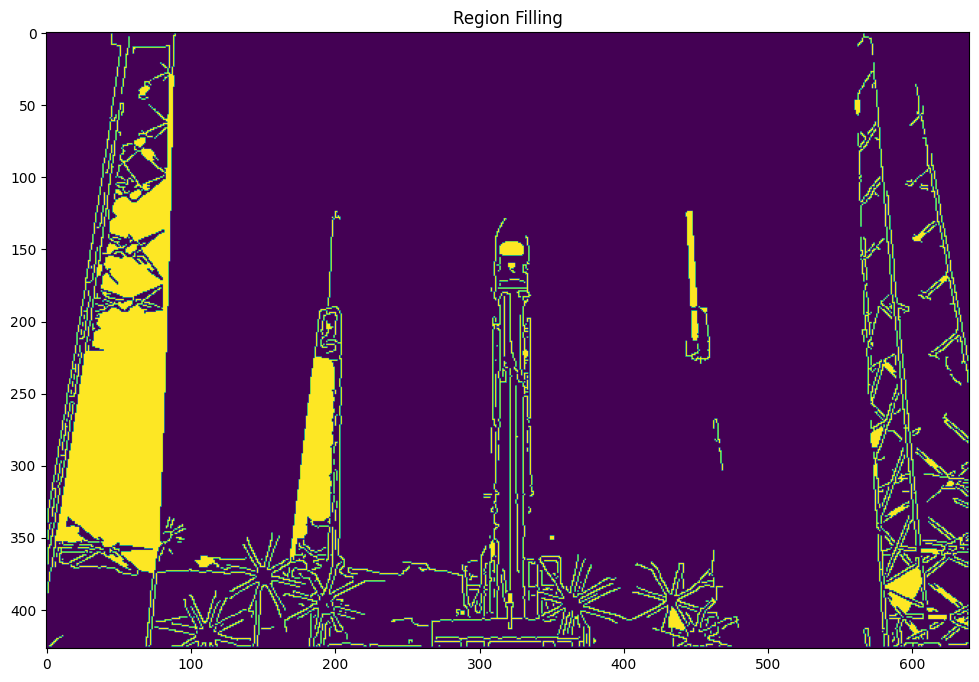

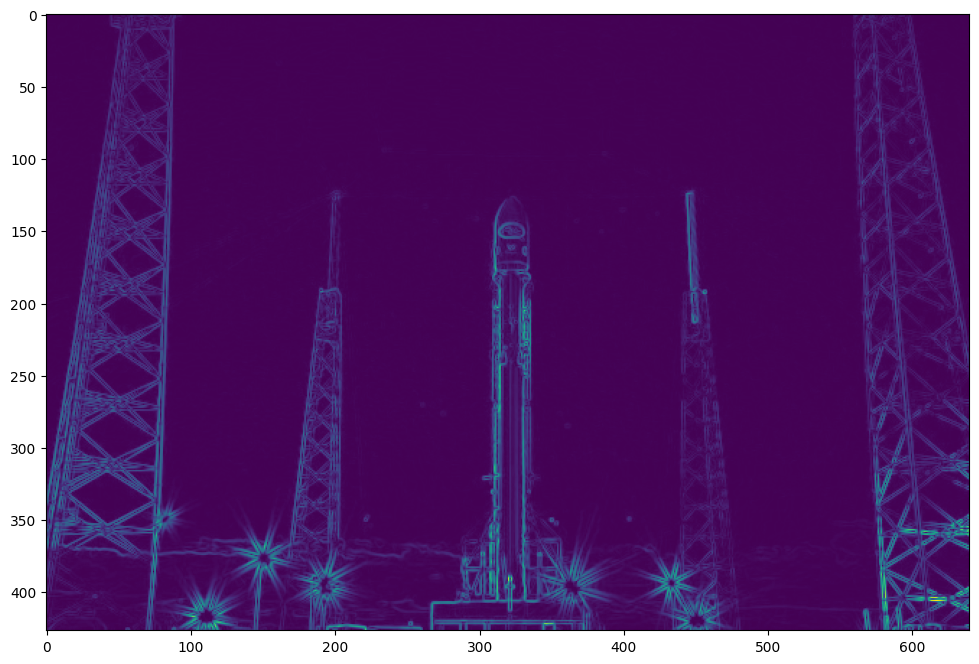

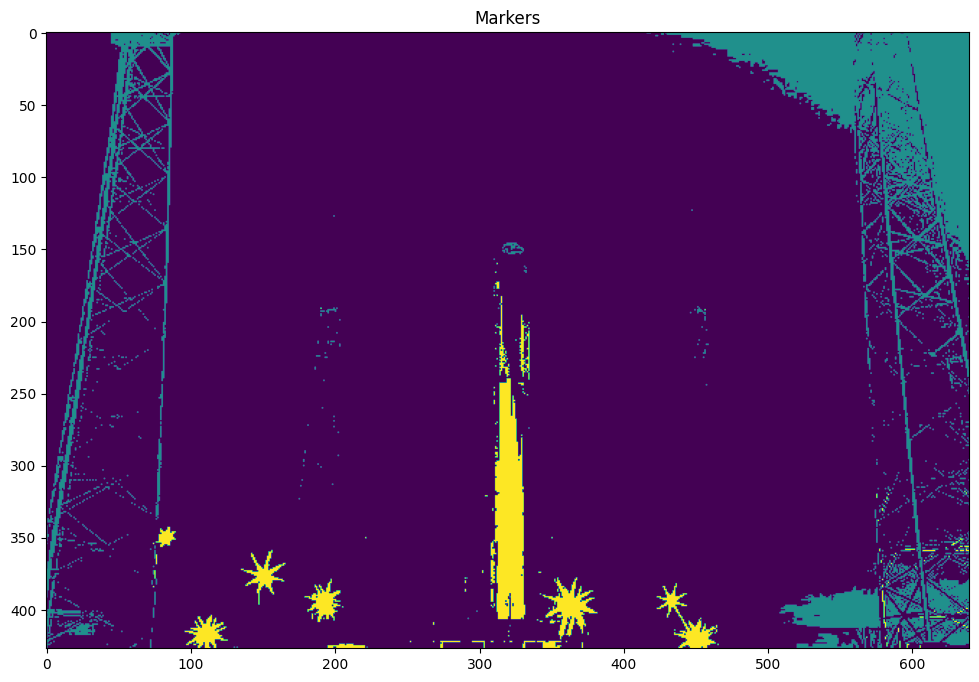

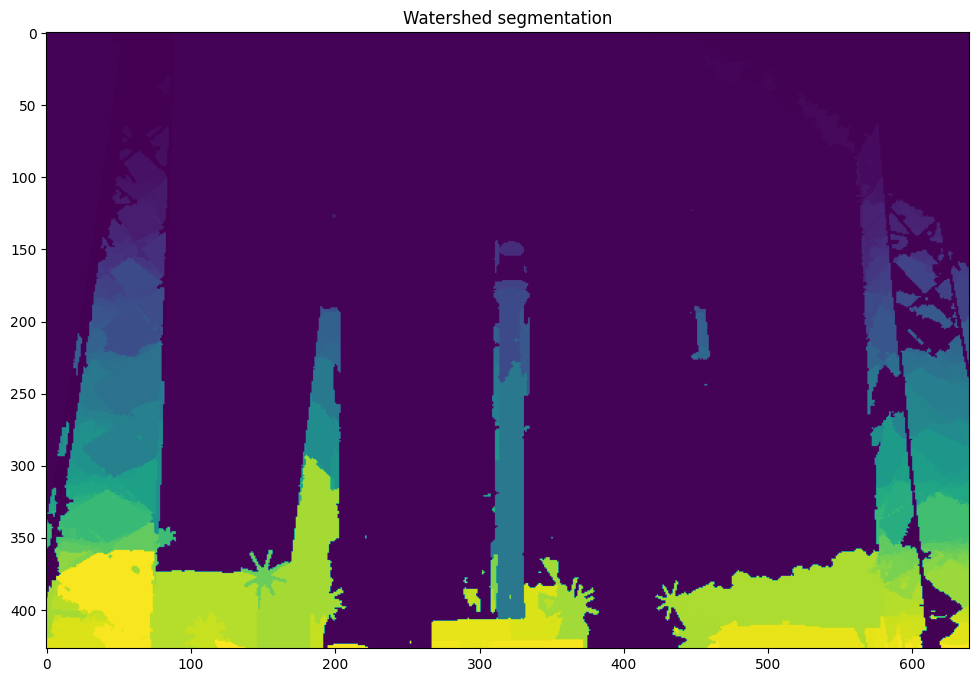

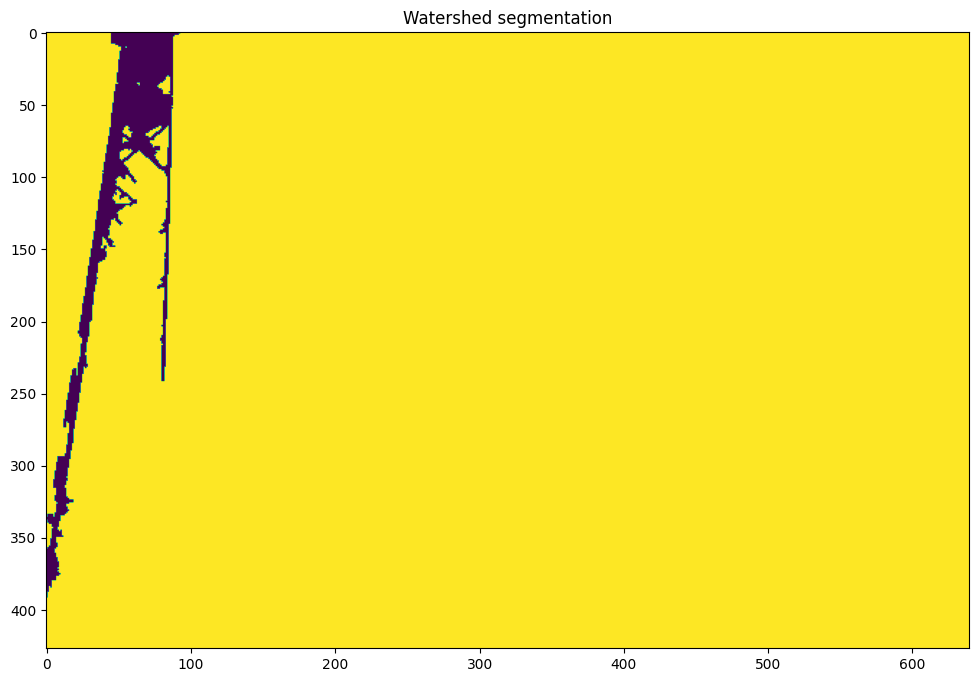

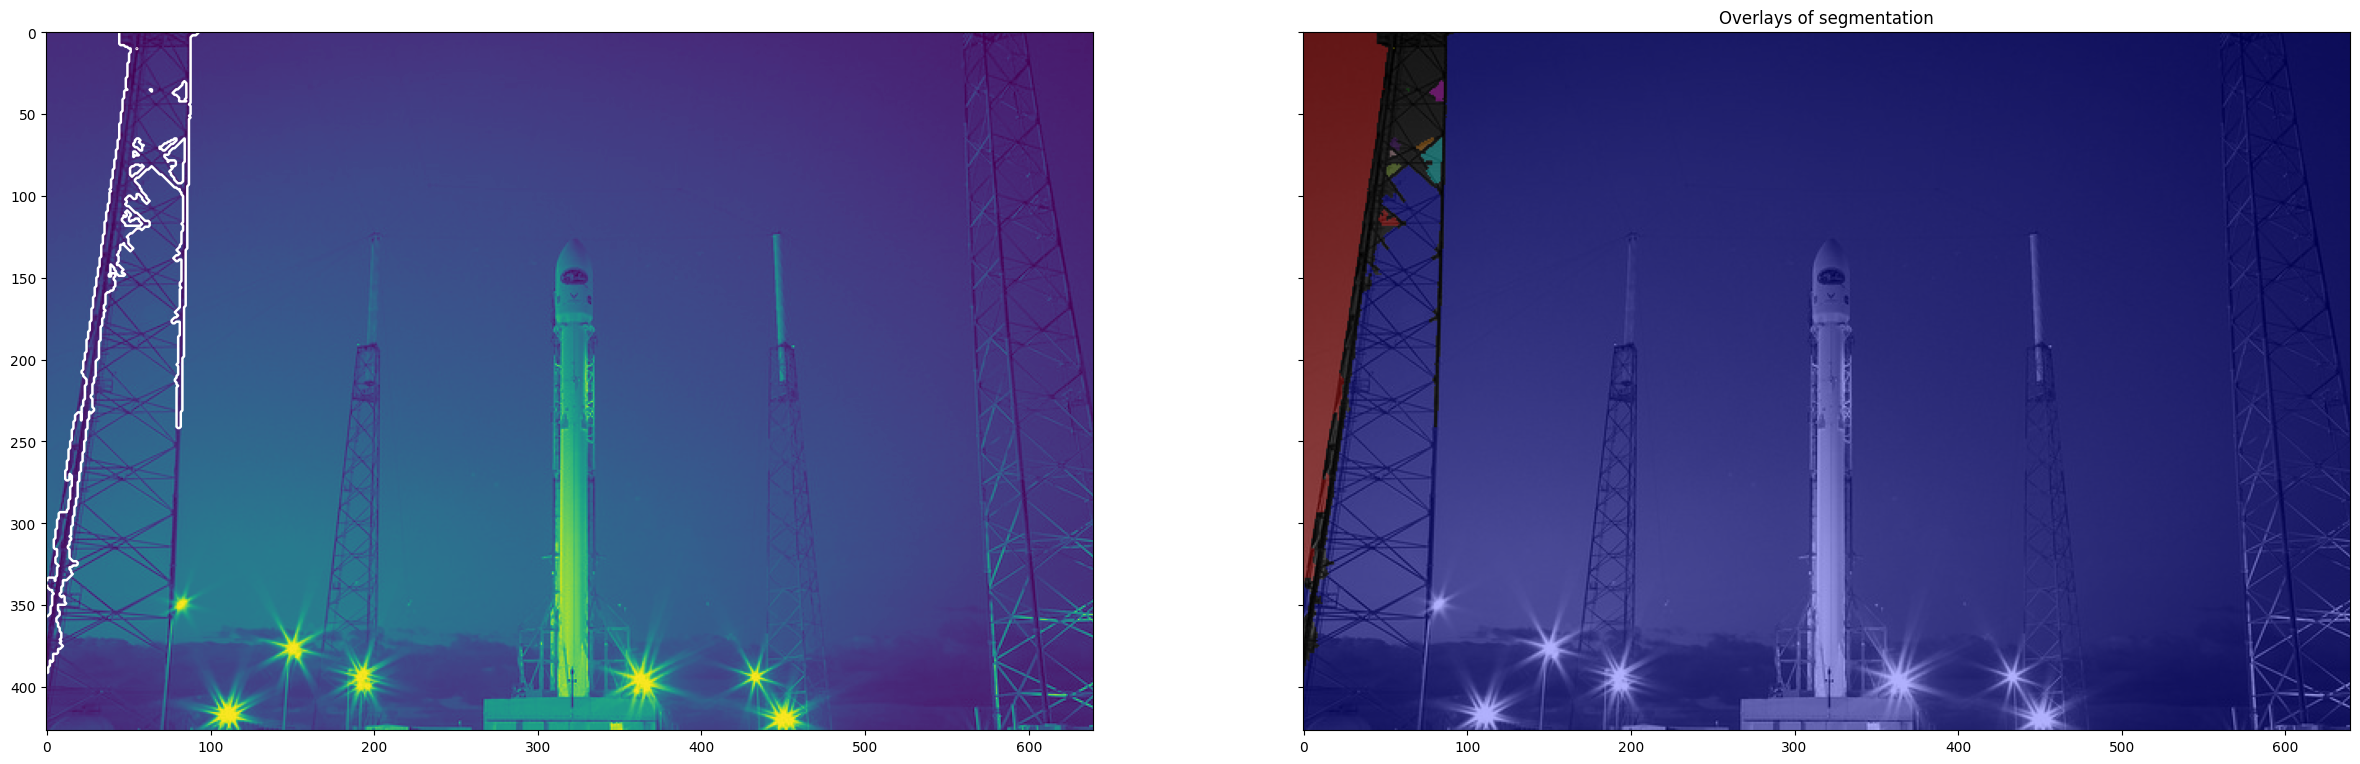

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data, morphology
from skimage.color import rgb2gray
from skimage.filters import sobel
import scipy.ndimage as nd
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.measure import label

plt.rcParams["figure.figsize"] = (12, 8)

# Load images and convert to grayscale
rocket = data.rocket()
rocket_wh = rgb2gray(rocket)

# Apply edge segmentation and plot Canny edge detection
edges = canny(rocket_wh)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')
plt.show()

# Fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')
plt.show()

# Region Segmentation
# First we print the elevation map
elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)
plt.show()

# Since the contrast difference is not much, we will perform it
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1  # 30/255
markers[rocket_wh > 0.5859375] = 2  # 150/255
plt.imshow(markers)
plt.title('Markers')
plt.show()

# Perform watershed region segmentation
segmentation = watershed(elevation_map, label(markers, connectivity=2), mask=rocket_wh)
plt.imshow(segmentation)
plt.title('Watershed segmentation')
plt.show()

# Plot overlays and contour
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)

# Overlay image with different labels
image_label_overlay = label2rgb(label_rock, image=rocket_wh)
plt.imshow(segmentation)
plt.title('Watershed segmentation')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
plt.title('Contours of segmentation')
ax2.imshow(image_label_overlay)

margins = {'left': 0.02, 'right': 0.98, 'top': 0.98, 'bottom': 0.02}
plt.title('Overlays of segmentation')
fig.subplots_adjust(**margins)

plt.show()
